In [1]:
import ROOT
from ROOT import larlite
from ROOT import TFile
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc as smp
%matplotlib inline

In [4]:
#f_s = TFile("dens_sel2_pi0.root","READ")
#f_t = TFile("dens_sel2_trk.root","READ")
f_s = TFile("dens_cosbnb_pi0_v1.root","READ")
f_t = TFile("dens_cosbnb_trk_v1.root","READ")


#V2 contains results from running first 3 python scriptfrom DC's area
n_rads = 15
rad_inc = 5

dens_all = [] 
hits_sh = []
hits_tr = []
rad_all  = [rad_inc*(i+1) for i in xrange(0,n_rads)]

s_evts = f_s.tree.GetEntries()
t_evts = f_t.tree.GetEntries()

print s_evts, t_evts
#t_evts = s_evts

print "N radS : ", n_rads
for j in xrange(n_rads):
   
    for i in xrange(s_evts):
        
        getEvt = f_s.tree.GetEntry(i)
        hits_sh.append(f_s.tree.hits_per_r[j])  
    
    for k in xrange(t_evts):
        
        getEvt = f_t.tree.GetEntry(k)
        hits_tr.append(f_t.tree.hits_per_r[j])  
    
hits_sh = np.array(hits_sh).reshape(n_rads,s_evts)
hits_tr = np.array(hits_tr).reshape(n_rads,t_evts)

#hit_sh_sum = [ float(np.cumsum(i)[-1]) / s_evts for i in hits_sh]
#hit_tr_sum = [ float(np.cumsum(i)[-1]) / t_evts for i in hits_tr]

668 4332
N radS :  15


In [5]:
def displayData(hit_sh_v,hit_tr_v,rad,display_dim):

    bin_size = 0.05; min_edge = 0; max_edge = 1
    N = (max_edge-min_edge)/bin_size; Nplus1 = N + 1
    bin_list = np.linspace(min_edge, max_edge, Nplus1)
    
    plt.figure(figsize=(30,30))
    for i in xrange(len(rad)):
        
        plt.subplot(display_dim+1,display_dim-1,i+1)
        sig0, bins_s, _ = plt.hist(hit_sh_v[i],bins=bin_list,normed=False,facecolor='blue',alpha=0.5,
                 label="BNB N $\pi0$ events")
        bkgd0, bins_b, _= plt.hist(hit_tr_v[i],bins=bin_list,normed=False,facecolor='red',alpha=0.5,
                 label="BNB track-like events")
        plt.title("Ratio of shrhits : gaushits at Rad = %d [cm]"%rad[i],size=20)
        plt.xlabel("Ratio of Enclosed Shower-like Hits : Gaushits")
        plt.ylabel("Counts")
        plt.legend(loc=10)
        #plt.yscale('log', nonposy='clip')
        plt.ylim(0,2600)
        plt.grid(True)
        s_tot = np.cumsum(sig0)[-1]
        b_tot = np.cumsum(bkgd0)[-1]
    
        #print "Rad ", rad[i], ", Bkgd bins : ", bkgd0
        
        eff = [ float(np.cumsum(sig0[i:])[-1])/s_tot for i in xrange(len(sig0)) ] 
        pur = [ float(np.cumsum(sig0[i:])[-1])/(np.cumsum(sig0[i:])[-1] + np.cumsum(bkgd0[i:])[-1]) for i in xrange(len(bkgd0)) ]
        
        mult = [ eff[i] * pur[i] for i in xrange(len(eff)) ]
        
        bins_ss = [i+bin_size/2 for i in bins_s]
        
        ax2 = plt.twinx()
        plt.plot(bins_ss[:-1],eff,'ko',label="Efficiency")       
        plt.plot(bins_ss[:-1],pur,'go',label="Purity")       
        plt.plot(bins_ss[:-1],mult,'bo',label="Eff * Pur")      
        ax2.set_ylabel('Efficiency', color='k')
        #for tl in ax2.get_yticklabels():
        #   tl.set_color('r')
        ax2.set_ylim(0,1)
        
    plt.show()

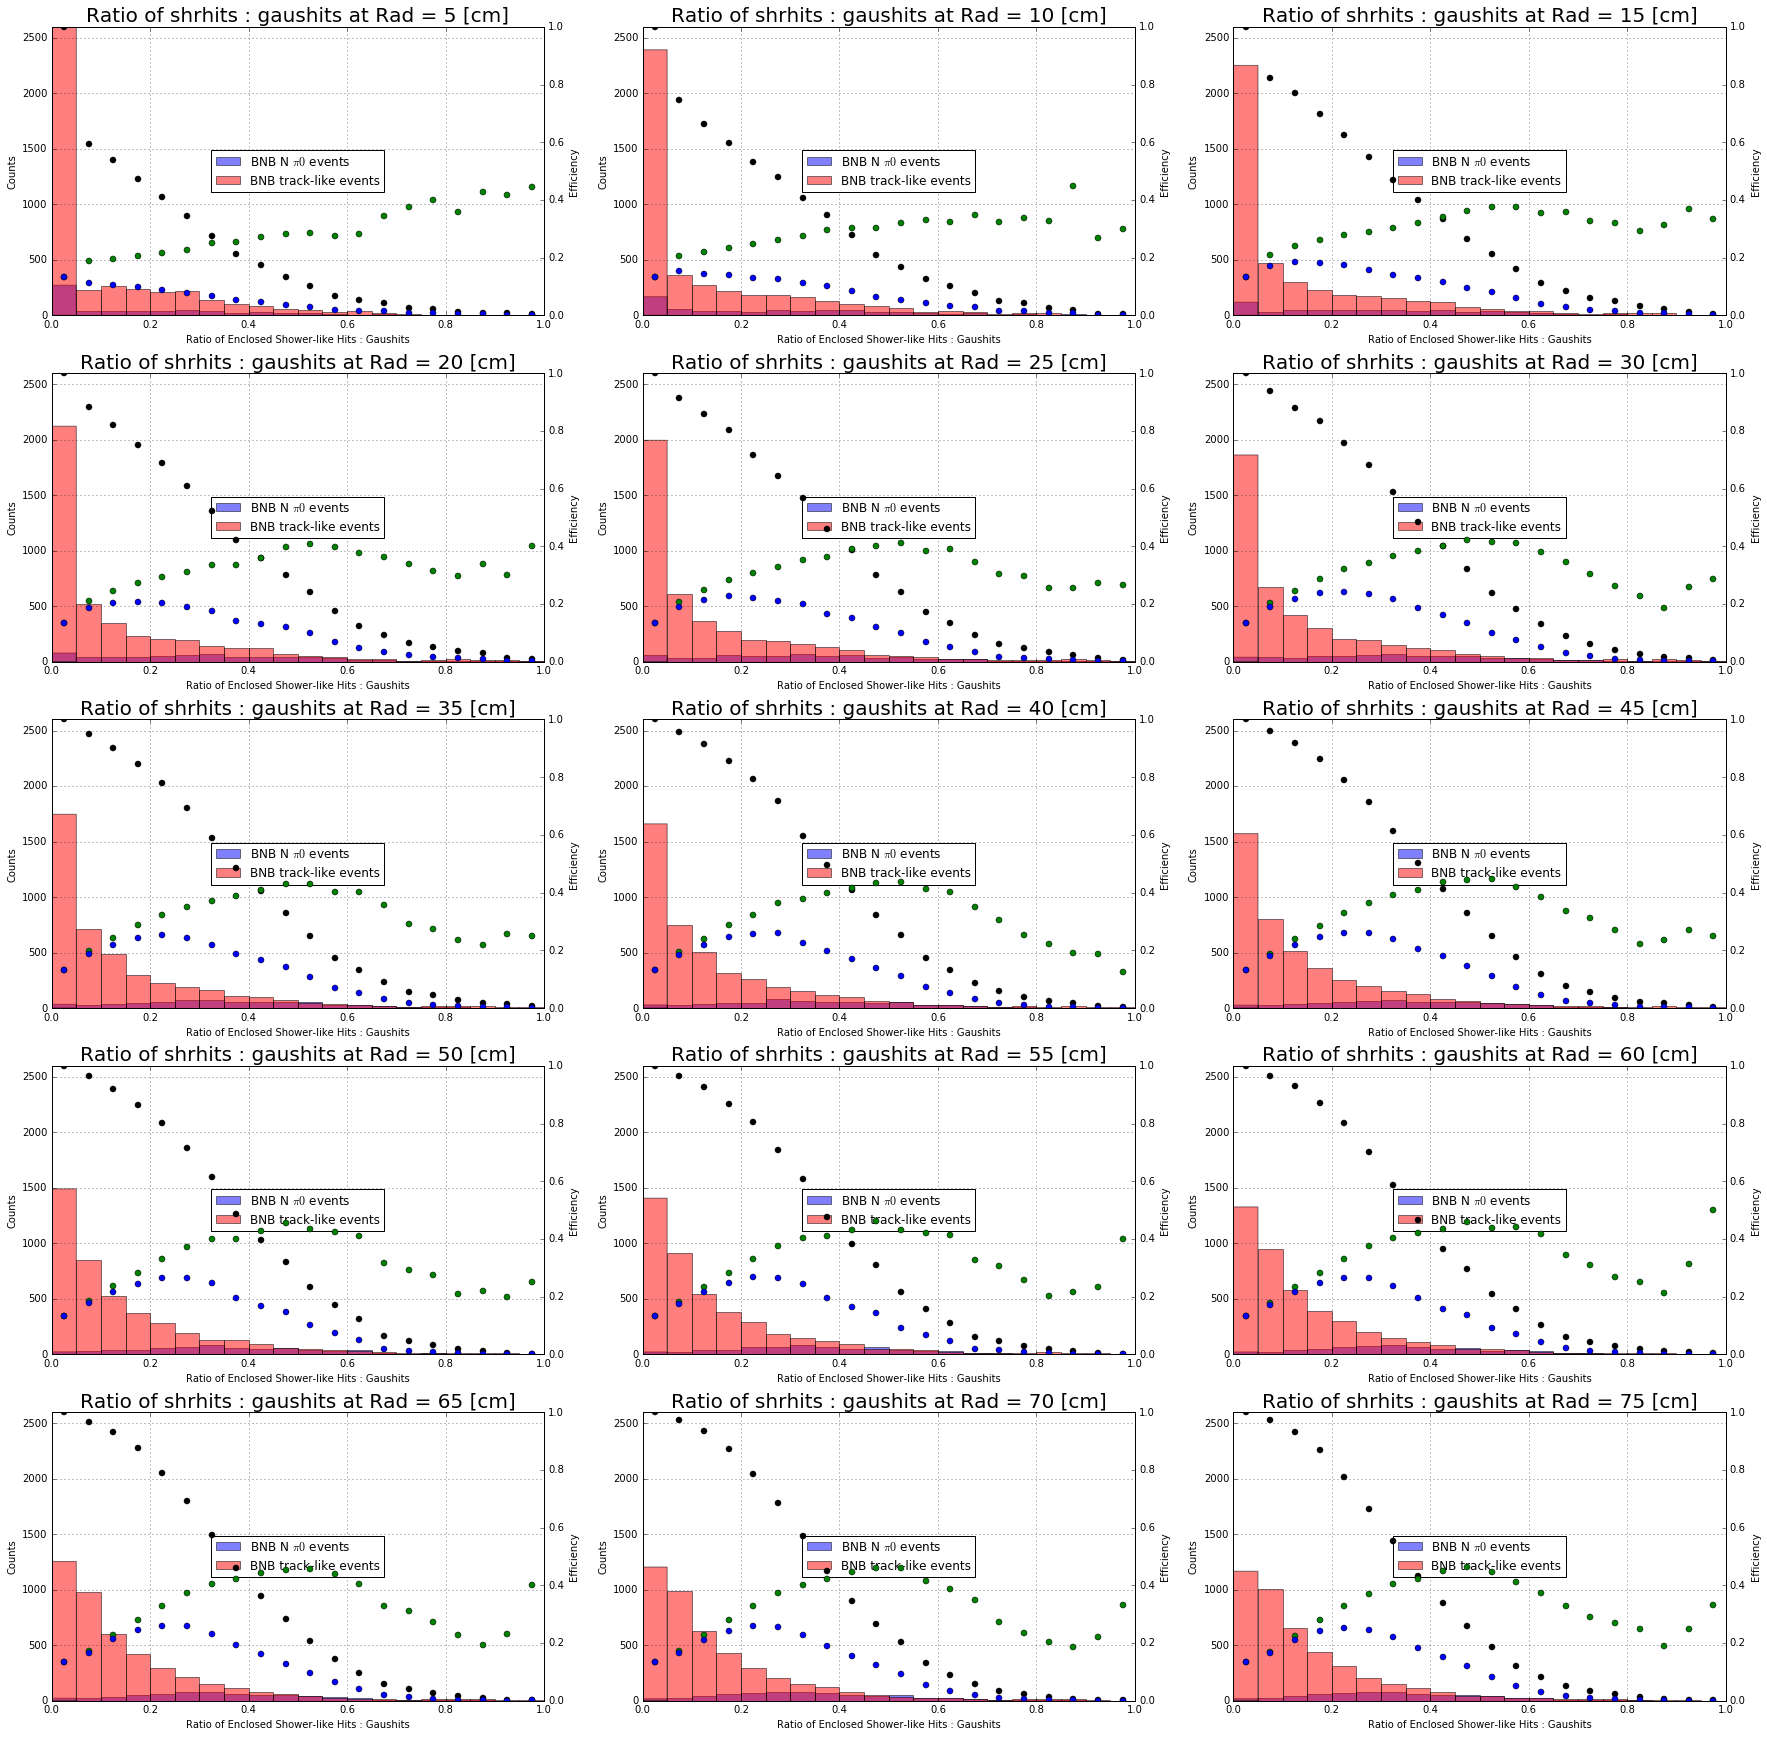

In [6]:
displayData(hits_sh,hits_tr,rad_all,4)

Total sig and back  668.0 4332.0 20 20
4.49550898204
[0.1336, 0.17680921052631579, 0.23232323232323232, 0.28383641674780913, 0.33065512978986406, 0.37519999999999998, 0.40515463917525774, 0.42198100407055633, 0.43315508021390375, 0.46046511627906977, 0.43710691823899372, 0.44166666666666665, 0.41818181818181815, 0.34482758620689657, 0.30851063829787234, 0.26666666666666666, 0.25, 0.21212121212121213, 0.3125, 0.5]


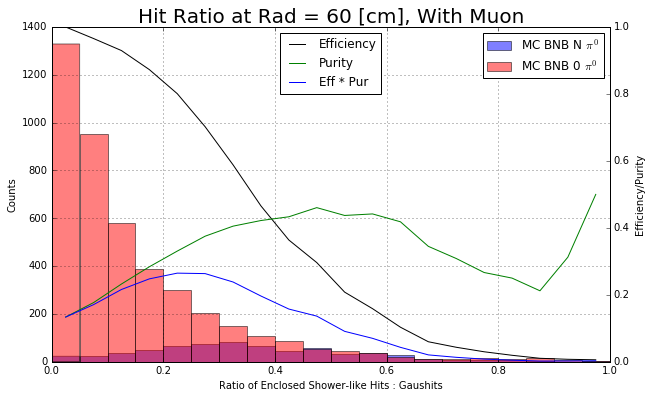

In [38]:
plt.figure(figsize=(10,6))
#for i in xrange(len(rad)/2,len(rad)):
hit_sh_v = hits_sh
hit_tr_v = hits_tr
rad = rad_all

bin_size = 0.05; min_edge = 0; max_edge = 1
N = (max_edge-min_edge)/bin_size; Nplus1 = N + 1
bin_list = np.linspace(min_edge, max_edge, Nplus1)

if True:
 
    if True:
        i =  11
        
        #plt.subplot(display_dim+1,display_dim-1,i+1)
        sig0, bins_s, _ = plt.hist(hit_sh_v[i],bins=bin_list,normed=False,facecolor='blue',alpha=0.5,
                 label="MC BNB N $\pi^0$")
        bkgd0, bins_b, _= plt.hist(hit_tr_v[i],bins=bin_list,normed=False,facecolor='red',alpha=0.5,
                 label="MC BNB 0 $\pi^0$")
        plt.title("Hit Ratio at Rad = %d [cm], With Muon"%rad[i],size=20)
        plt.xlabel("Ratio of Enclosed Shower-like Hits : Gaushits")
        plt.ylabel("Counts")
        plt.legend(loc=0)
        #plt.ylim(0,30)
        #plt.yscale('log', nonposy='clip')
        plt.grid(True)
        s_tot = np.cumsum(sig0)[-1]
        b_tot = np.cumsum(bkgd0)[-1]
        print "Total sig and back ", s_tot, b_tot, len(sig0), len(bkgd0)
        print float(np.cumsum(bkgd0[1:])[-1])/s_tot
        
        eff = [ float(np.cumsum(sig0[i:])[-1])/s_tot for i in xrange(len(sig0)) ] 
        #pur = [ 1- float(np.cumsum(bkgd0[i:])[-1])/(b_tot+s_tot) for i in xrange(len(bkgd0)) ] 
        pur = [ float(np.cumsum(sig0[i:])[-1])/(np.cumsum(sig0[i:])[-1] + np.cumsum(bkgd0[i:])[-1]) for i in xrange(len(bkgd0)) ] 
        print pur
        bins_ss = [i+bin_size/2 for i in bins_s]
        
        mult = [ eff[i] * pur[i] for i in xrange(len(eff)) ]
        
        ax2 = plt.twinx()
        plt.plot(bins_ss[:-1],eff,'k-',label="Efficiency")       
        plt.plot(bins_ss[:-1],pur,'g-',label="Purity")       
        plt.plot(bins_ss[:-1],mult,'b-',label="Eff * Pur")       
        ax2.set_ylabel('Efficiency/Purity', color='k')
        ax2.legend(loc=9)
        #ax2.legend(loc='center left', bbox_to_anchor=(1.15, 0.5))
        #for tl in ax2.get_yticklabels():
           #tl.set_color('r')
        #ax2.set_ylim(0.26,0.3)
        
    plt.show()

In [24]:
cut = 5

print "Percent of preserved signal: %.2f " % (np.cumsum(sig0[cut:])[-1] / np.cumsum(sig0)[-1] * 100)
#print np.cumsum(sig0[cut:])[-1] , np.cumsum(bkgd0[cut:])[-1]
#print np.cumsum(sig0)[-1] , np.cumsum(bkgd0)[-1]
print "Purirty of preserved signal: %.2f " % \
(100*np.cumsum(sig0[cut:])[-1] / ( np.cumsum(bkgd0[cut:])[-1] + np.cumsum(sig0[cut:])[-1] ))
#print np.cumsum(sig0[cut:])[-1] + np.cumsum(bkgd0[cut:])[-1]

Percent of preserved signal: 70.21 
Purirty of preserved signal: 37.52 


In [15]:
17* 0.29

4.93